# Customer-Churn-Prediction
First, we need to import the necessary libraries for data analysis, model training, and evaluation. These libraries include:

- **Data Processing**: `pandas`, `numpy`
- **Visualization**: `matplotlib.pyplot`, `seaborn`
- **Modeling and Evaluation**: `sklearn`, `xgboost`, `imblearn`
- **Saving and Loading Models**: `joblib`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


## Data Exploration & Preprocessing
### Examine the Data
#### Review the Dataset Structure
We load the dataset and inspect its structure to understand the features (columns) and their data types.

In [2]:
# Load the dataset
df = pd.read_csv('churn.csv')

# Check the shape of the dataset (rows, columns)
print("Dataset shape (rows, columns):\n", df.shape)

# Get dataset information (column names, non-null counts, data types)
print("Dataset Info:\n")
df.info()

# Display first 5 rows
print("\nFirst 5 rows:\n", df.head())

Dataset shape (rows, columns):
 (10000, 14)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

First 5 rows:
    RowNumber  Custo

The dataset includes these columns:

- RowNumber: The row number of each customer in the data.

- CustomerId: An individual identifier for each customer.

- Surname: The customer's  surname.

- CreditScore: The customer’s credit score (the higher the better).

- Geography: The customer’s location

- Gender: The customer's gender

- Age: The customer’s age.

- Tenure: The length of time the customer has been with the bank (in years).

- Balance: The balance in the user’s account.

- NumOfProducts: The number of banking products the customer uses (e.g., checking, savings, loans, etc.).

- HasCrCard: Does the customer have a credit card? (1 means yes, 0 means no).

- IsActiveMember: Is the customer active? (1 means active, 0 means inactive).

- EstimatedSalary: The customer’s estimated salary.

- Exited: Has the customer left the bank? (1 means left, 0 means not left).

#### Summarize the Data
Calculate summary statistics for the numerical columns to understand the distribution, central tendency, and spread of the data.

In [3]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

The table provides descriptive statistics for each column in the dataset. Here's what each row means:

- count: The number of non-missing values in the column.

All columns have 10,000 entries, meaning there are no missing values.

- mean: The average value of the column.

For example: The average credit score is 650.53, and the average age is 38.92.

- std: The standard deviation, which measures the dispersion of the data around the mean.

For example, the standard deviation for Age is about 10.49, meaning that customers are typically between 28 and 49 years old.

- min: The minimum value in the column.

For example: The youngest customer is 18 years old, and the lowest credit score is 350.

- 25%: The 25th percentile (first quartile).

For example: 25% of customers have a balance of 0 or less, and 25% are 32 years old or younger.

- 50%: The 50th percentile (median).

For example: The median credit score is 652, and the median balance is 97,198.54.

- 75%: The 75th percentile (third quartile).

For example: 75% of customers have a credit score of 718 or less, and 75% are 44 years old or younger.

- max: The maximum value in the column.

For example: The oldest customer is 92 years old, and the highest credit score is 850.

#### Checking for Missing Values
Missing values can affect the performance of the model, so it's essential to handle them appropriately. After checking, we find there are no missing values.

In [4]:
# Total missing values per column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#### Histograms

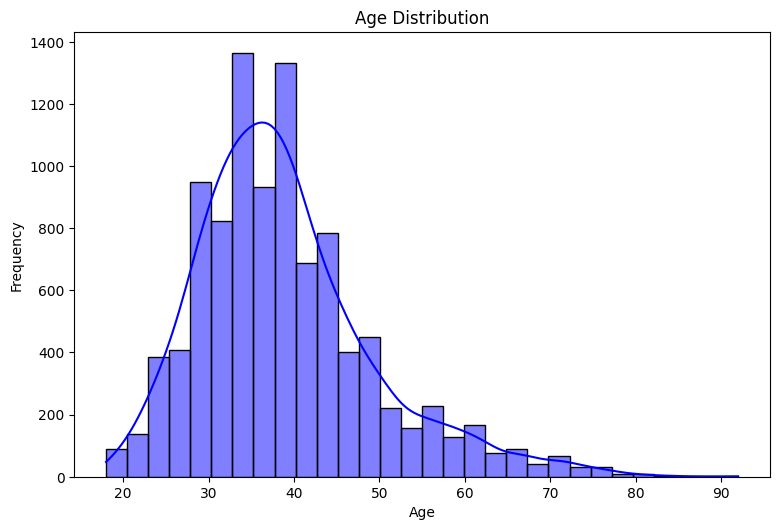

In [11]:
# General settings for charts
plt.figure(figsize=(15, 10))

# Age histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show charts
plt.tight_layout()
plt.show()

- X-Axis (Age):

Represents the age of customers, ranging from 18 to 92 years.

- Y-Axis (Frequency):

Represents the number of customers (frequency) in each age group (bin).

- Bars:

Each bar corresponds to a specific age range (bin) and shows how many customers fall into that range.

##### Observations from the Histogram
- Peak Age Group:

The highest bars indicate the age groups with the most customers.

From the histogram, the peak appears to be around 30–40 years, suggesting this is the most common age group in the dataset.

- Spread of Ages:

The distribution shows a gradual decrease in frequency as age increases beyond the peak.

There are fewer customers in the 60+ age groups compared to younger age groups.

- Shape of the Distribution:

The histogram appears to be right-skewed, meaning there is a longer tail on the right side (older ages).

This indicates that while most customers are younger, there is still a significant number of older customers.

- Outliers:

The histogram shows some customers in the 80–90 age range, though the frequency is very low.

These could be considered outliers or less common in the dataset.

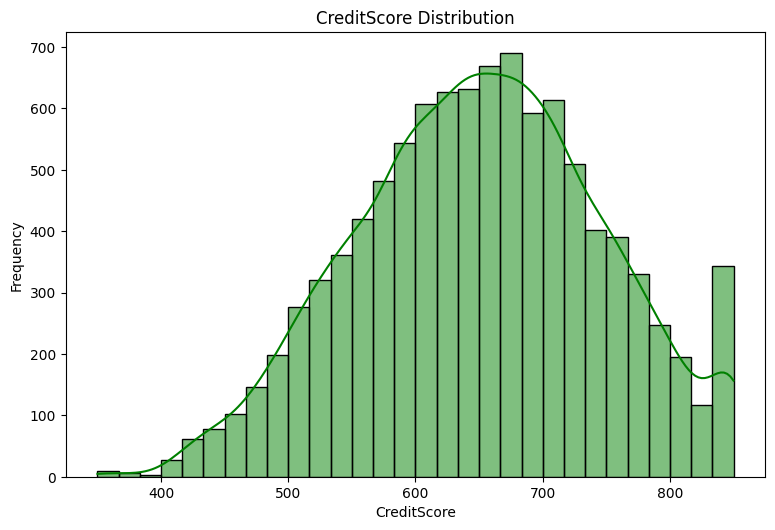

In [14]:
# General settings for charts
plt.figure(figsize=(15, 10))

# CreditScore histogram
plt.subplot(2, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='green')
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

# Show charts
plt.tight_layout()
plt.show()

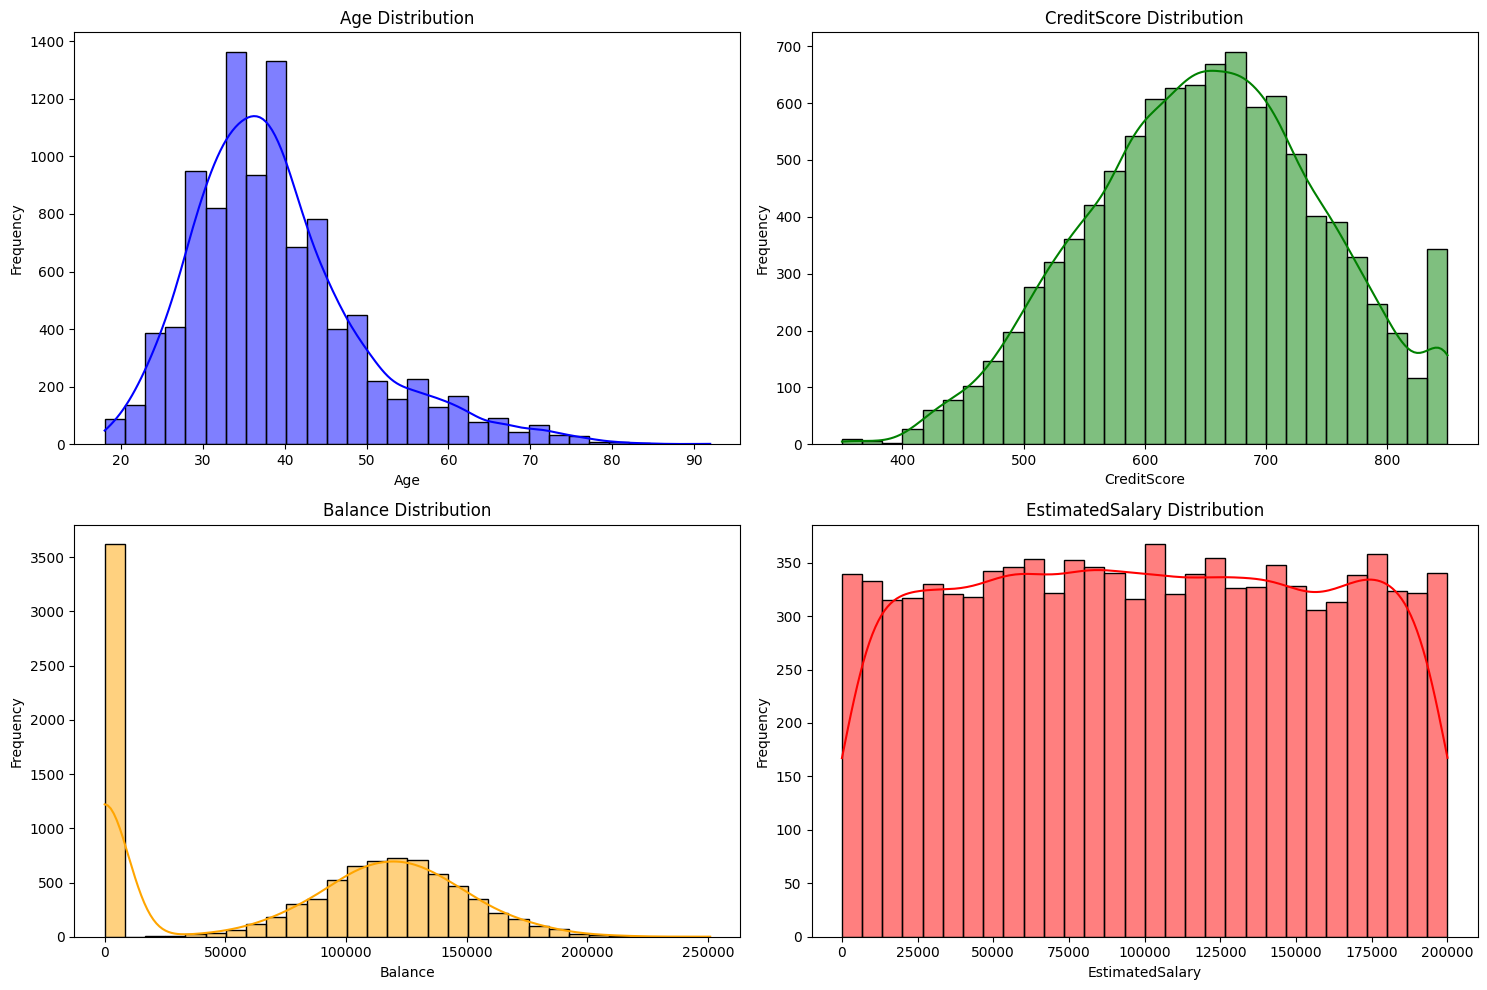

In [7]:
# CreditScore histogram
plt.subplot(2, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='green')
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

# Balance histogram
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# EstimatedSalary histogram
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='red')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')

# Show charts
plt.tight_layout()
plt.show()